In [90]:
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin

In [91]:
#r = requests.get('/Data/CarbonEmisson.csv')
carbon = pd.read_csv('../CSC-Project/Data/carbon.csv',index_col='Country')
carbon.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1062.0,1176.0,1324.0,1434.0,1989.0,904.0,898.0,1466.0,1395.0,1460.0,...,513.0,561.0,513.0,548.0,558.0,559.0,565.0,594.0,608.0,620.0
Albania,4455.0,4446.0,5058.0,4659.0,4875.0,5037.0,5419.0,5725.0,6430.0,7561.0,...,3845.0,4730.0,4389.0,4431.0,4369.0,4227.0,4505.0,4869.0,4739.0,4875.0
Algeria,19383.0,21831.0,31069.0,40176.0,35373.0,33310.0,41740.0,45957.0,51307.0,53420.0,...,89276.0,93457.0,98427.0,102106.0,106292.0,112541.0,114300.0,117063.0,126732.0,132411.0
American Samoa,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,18.0,18.0,19.0,19.0,19.0,20.0,20.0,21.0,21.0,21.0
Angola,8707.0,8653.0,9700.0,9813.0,10032.0,9588.0,8545.0,9216.0,10556.0,10520.0,...,17430.0,15886.0,15840.0,16476.0,16306.0,17289.0,18628.0,20824.0,21641.0,22286.0


In [92]:
temperatures = pd.read_csv('../CSC-Project/Data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])
temperatures['dt'] = temperatures['dt'].apply(lambda x: x.year)
temperatures.columns = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']
temperatures.head()

,Year,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,4.384,2.294,Åland
1,1743,NaN,NaN,Åland
2,1744,NaN,NaN,Åland
3,1744,NaN,NaN,Åland
4,1744,NaN,NaN,Åland


In [109]:
world_data=carbon[carbon.index=='World'].values[:]
world_data

array([[ 15612006.,  15761465.,  16542539.,  17514128.,  17456557.,
         17383865.,  18361854.,  18928278.,  19430309.,  19983282.,
         19695492.,  19354357.,  19077173.,  19154998.,  19741453.,
         19959705.,  20288381.,  20377373.,  21662529.,  22045994.,
         22667118.,  22689823.,  22583567.,  22796123.,  22949955.,
         23618659.,  24218648.,  24389995.,  24589312.,  24796728.,
         25360690.,  25448512.,  26065591.,  27187290.,  28551936.,
         29345874.,  30345386.,  31410328.,  31962251.,  31573638.,
         32991556.,  34008849.,  34576135.,  35274106.]])

In [108]:
dates = temperatures['Year'].drop_duplicates().values
temps = temperatures.groupby(['Year']).mean()['AverageTemperature'].values
unc_temps = temperatures.groupby(['Year']).mean()['AverageTemperatureUncertainty'].values
#from 1970 to 2013
dates = dates[-44:]
temps = temps[-44:]
unc_temps = unc_temps[-44:]

In [95]:
df = pd.DataFrame({'Average Temp' : temps,
                   'CO2' : world_data[0],
                  'Average Temp Uncertainty' : unc_temps},index=dates)
df.head()

,Average Temp,Average Temp Uncertainty,CO2
1970,18.794121,0.341842,15612006.0
1971,18.588207,0.334640,15761465.0
1972,18.665612,0.352646,16542539.0
1973,18.873293,0.356324,17514128.0
1974,18.631447,0.337361,17456557.0


In [105]:
from sklearn.linear_model import LinearRegression
#use 22 years for train data and next 22 as test
train = df[:24]
test = df[23:]
X_train = train.drop('Average Temp', axis=1).reset_index().drop('index', axis =1)
X_test = test.drop('Average Temp', axis=1).reset_index().drop('index', axis =1)
Y_train = train['Average Temp']
Y_test = test['Average Temp']
lr_elect = LinearRegression()
lr_elect.fit(X_train,Y_train)
lr_elect.score(X_test, Y_test)

0.14408479188974976

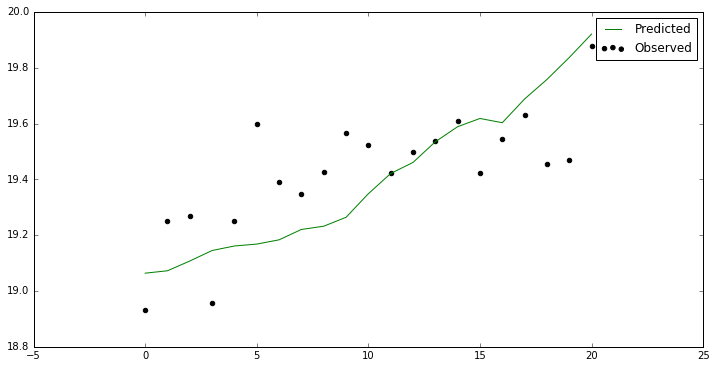

In [106]:
y_lr = lr_elect.predict(X_test)
plt.figure(figsize=(12,6))
plt.scatter(X_test.index, Y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

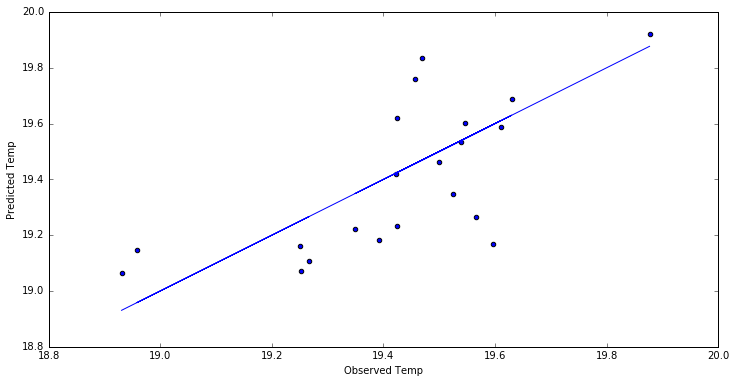

In [107]:
fig = plt.figure(figsize=(12,6))
plt.plot(Y_test, Y_test)
plt.scatter(Y_test,y_lr)
plt.xlabel('Observed Temp')
plt.ylabel('Predicted Temp')